In [1]:
 !wget https://github.com/michael-franke/npNLG/raw/main/neural_pragmatic_nlg/data/A3DS/A3DS.zip


--2023-05-17 15:59:32--  https://github.com/michael-franke/npNLG/raw/main/neural_pragmatic_nlg/data/A3DS/A3DS.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/michael-franke/npNLG/main/neural_pragmatic_nlg/data/A3DS/A3DS.zip [following]
--2023-05-17 15:59:32--  https://raw.githubusercontent.com/michael-franke/npNLG/main/neural_pragmatic_nlg/data/A3DS/A3DS.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31636302 (30M) [application/zip]
Saving to: ‘A3DS.zip’

A3DS.zip            100%[===================>]  30.17M  --.-KB/s    in 0.1s    

2023-05-17 15:59:34 (219 MB/s) - ‘A3DS.zip’ saved [3

In [2]:
!unzip A3DS.zip

Archive:  A3DS.zip
   creating: A3DS/
  inflating: __MACOSX/._A3DS         
  inflating: A3DS/sandbox_3Dshapes_1000.pkl  
  inflating: __MACOSX/A3DS/._sandbox_3Dshapes_1000.pkl  
  inflating: A3DS/sandbox_3Dshapes_resnet50_features_1000.pt  
  inflating: __MACOSX/A3DS/._sandbox_3Dshapes_resnet50_features_1000.pt  
  inflating: A3DS/vocab.pkl          
  inflating: __MACOSX/A3DS/._vocab.pkl  
  inflating: A3DS/pretrained_decoder_3dshapes.pkl  
  inflating: __MACOSX/A3DS/._pretrained_decoder_3dshapes.pkl  
  inflating: A3DS/sandbox_IDs_3dshapes_1000.txt  
  inflating: __MACOSX/A3DS/._sandbox_IDs_3dshapes_1000.txt  


In [3]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.9 MB/s eta 0:00:00


In [35]:

from transformers import GPT2TokenizerFast, ViTImageProcessor, VisionEncoderDecoderModel
from torch.utils.data import Dataset
from torchtext.data import get_tokenizer
import requests
import torch
import numpy as np
from PIL import Image
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [36]:
model_raw = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

In [37]:
image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer       = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

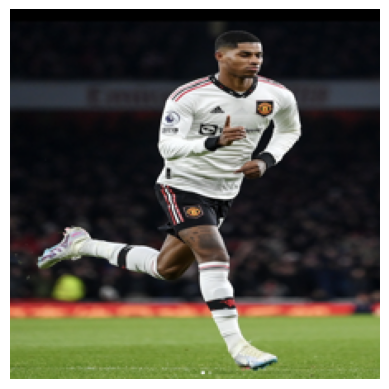

a man is dribbling the ball in a baseball game 
---
the men in purple uniforms playing soccer 
---
a man plays soccer in a stadium 
---
a soccer player wearing a red shirt kicks soccer balls 
---
a man getting ready to kick the soccer ball during a match 
---


In [38]:
def generate_captions(image_path, num_captions=3):
    image = Image.open(image_path).convert("RGB")  # Convert image to RGB format
    image = image.resize((224, 224))  # Resize the image if needed
    image = np.array(image)
    image = torch.tensor(image).permute(2, 0, 1).unsqueeze(0)
    pixel_values = image.float() / 255.0  # Normalize pixel values to [0, 1]

    generated_captions = []

    for _ in range(num_captions):
        generated_ids = model_raw.generate(pixel_values, max_new_tokens=30, do_sample=True)
        generated_caption = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]
        generated_captions.append(generated_caption)

    image_np = pixel_values.squeeze().permute(1, 2, 0).numpy()  # Convert tensor to NumPy array
    plt.imshow(image_np)
    plt.axis('off')
    plt.show()

    for caption in generated_captions:
        print(caption)
        print('---')

image_path = "/content/Image1.png"
generate_captions(image_path, num_captions=5)

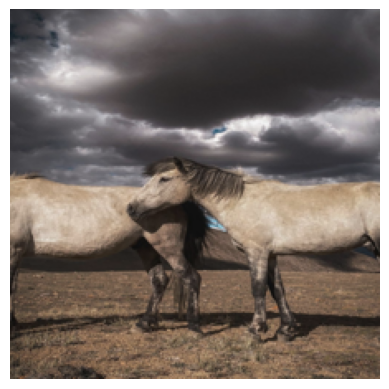

a woman holds a horse near her ear 
---
a girl smiling as she's taking a picture of a horse's head 
---
a beautiful brunette horse standing in the dirt 
---
a woman holding a horse with its mouth open 
---
a woman looking into the distance while holding a horse 
---


In [39]:
def generate_captions(image_path, num_captions=3):
    image = Image.open(image_path).convert("RGB")  # Convert image to RGB format
    image = image.resize((224, 224))  # Resize the image if needed
    image = np.array(image)
    image = torch.tensor(image).permute(2, 0, 1).unsqueeze(0)
    pixel_values = image.float() / 255.0  # Normalize pixel values to [0, 1]

    generated_captions = []

    for _ in range(num_captions):
        generated_ids = model_raw.generate(pixel_values, max_new_tokens=30, do_sample=True)
        generated_caption = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]
        generated_captions.append(generated_caption)

    image_np = pixel_values.squeeze().permute(1, 2, 0).numpy()  # Convert tensor to NumPy array
    plt.imshow(image_np)
    plt.axis('off')
    plt.show()

    for caption in generated_captions:
        print(caption)
        print('---')

image_path = "/content/Image2.png"
generate_captions(image_path, num_captions=5)

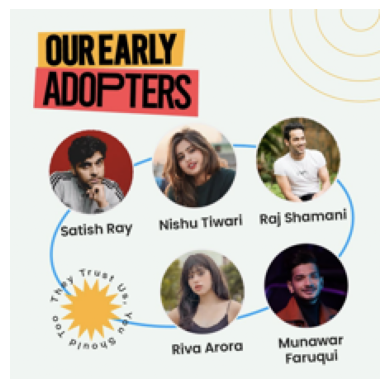

an illustration of girls and a man that is also in advertising 
---
a table of some kind with various pictures of cats and dogs 
---
a series of five pictures with words written on them 
---
a series of pictures of female professional women 
---
two pictures of children engaged in the work on the american trade union paper 
---


In [40]:
def generate_captions(image_path, num_captions=3):
    image = Image.open(image_path).convert("RGB")  # Convert image to RGB format
    image = image.resize((224, 224))  # Resize the image if needed
    image = np.array(image)
    image = torch.tensor(image).permute(2, 0, 1).unsqueeze(0)
    pixel_values = image.float() / 255.0  # Normalize pixel values to [0, 1]

    generated_captions = []

    for _ in range(num_captions):
        generated_ids = model_raw.generate(pixel_values, max_new_tokens=30, do_sample=True)
        generated_caption = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]
        generated_captions.append(generated_caption)

    image_np = pixel_values.squeeze().permute(1, 2, 0).numpy()  # Convert tensor to NumPy array
    plt.imshow(image_np)
    plt.axis('off')
    plt.show()

    for caption in generated_captions:
        print(caption)
        print('---')

image_path = "/content/Image3.png"
generate_captions(image_path, num_captions=5)

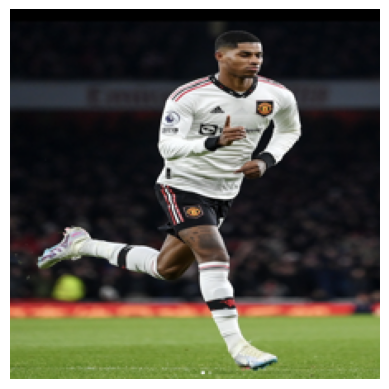

a man in a field kicking a soccer ball 
---
a football player kicks the ball on the field 
---
a soccer player kicking the ball in air 
---
a soccer player that is running in the soccer game 
---
a man kicking a soccer ball during a game 
---


In [34]:
# !wget https://github.com/michael-franke/npNLG/raw/main/neural_pragmatic_nlg/data/A3DS/A3DS.zip
# !unzip A3DS.zip
# !pip install transformers

from transformers import GPT2TokenizerFast, ViTImageProcessor, VisionEncoderDecoderModel
from torch.utils.data import Dataset
from torchtext.data import get_tokenizer
import requests
import torch
import numpy as np
from PIL import Image
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

#This line ignores warning messages
import warnings
warnings.filterwarnings('ignore')

#This line loads the pretrained VisionEncoderDecoderModel from the "nlpconnect/vit-gpt2-image-captioning" checkpoint.
model_raw = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

#This line loads the pretrained ViTImageProcessor from the "nlpconnect/vit-gpt2-image-captioning" checkpoint.
image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

#This line loads the pretrained GPT2TokenizerFast from the "nlpconnect/vit-gpt2-image-captioning" checkpoint.
tokenizer = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

#This line imports the Image class from the PIL (Python Imaging Library) module, which provides functionalities for working with images.
from PIL import Image

def generate_captions(image_path, num_captions=3):
    # Convert image to RGB format
    image = Image.open(image_path).convert("RGB")
    
    # Resize the image if needed
    image = image.resize((224, 224))
    
    # Convert the image to a NumPy array and rearrange dimensions for PyTorch
    image = np.array(image)
    image = torch.tensor(image).permute(2, 0, 1).unsqueeze(0)
    
    # Normalize pixel values to [0, 1]
    pixel_values = image.float() / 255.0

    generated_captions = []

    for _ in range(num_captions):
        # Generate caption IDs using the pre-trained model
        generated_ids = model_raw.generate(pixel_values, max_new_tokens=30, do_sample=True)
        
        # Decode the generated caption IDs into text
        generated_caption = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]
        
        # Append the generated caption to the list
        generated_captions.append(generated_caption)

    # Convert the tensor to a NumPy array and rearrange dimensions for visualization
    image_np = pixel_values.squeeze().permute(1, 2, 0).numpy()
    
    # Display the image using Matplotlib
    plt.imshow(image_np)
    plt.axis('off')
    plt.show()

    # Print the generated captions
    for caption in generated_captions:
        print(caption)
        print('---')

# Path to the image file
image_path = "/content/Image1.png"

# Call the generate_captions function with the specified number of captions
generate_captions(image_path, num_captions=5)


# New Section